In [1]:
import os
import json
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import ray
from ray import tune
from ray.tune.schedulers import HyperBandForBOHB
from ray.tune.suggest.bohb import TuneBOHB
import ConfigSpace as CS
from functools import partial

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump, load

In [11]:
def plot_loss(data_train, data_val):
    epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    plt.clf()
    plt.figure()
    plt.rcParams["figure.figsize"] = (6,6)
    plt.xlabel('Epoch')
    plt.ylabel('Average Epoch Loss')
    plt.suptitle('Average Loss')
    plt.plot(epochs, data_train)
    plt.plot(epochs, data_val)
    plt.legend(['Training', 'Validation'], loc='upper right', fancybox=True)
    plt.savefig("training_loss.png", dpi=300, bbox_inches='tight')

In [12]:
loss_train, loss_val = np.loadtxt("C:/Users/s_kal/ray_results/train_FFNN_2022-07-23_02-10-45/train_FFNN_a35ed4f0_8_h_layers=0,h_neurons=64,lr=0.0001_2022-07-23_04-44-17/loss.csv", delimiter=',', unpack=True, skiprows=1)

In [13]:
loss_train

array([3.68870480e-02, 4.46950140e-03, 2.28614358e-03, 1.17248579e-03,
       6.15696072e-04, 3.50277221e-04, 2.23942939e-04, 1.12566552e-04,
       6.89819502e-05, 1.54158406e-05, 4.42269616e-06, 5.01837994e-07,
       3.55285496e-08, 2.18020066e-09, 7.41746184e-10, 2.94049539e-10,
       1.96033030e-10, 1.29805659e-10, 1.77489369e-10, 1.56296614e-10])

<Figure size 432x432 with 0 Axes>

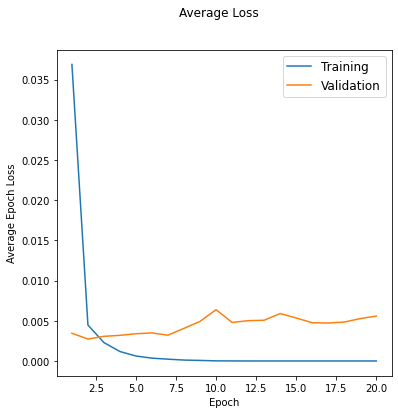

In [14]:
plot_loss(loss_train, loss_val)

BOHB Example: https://docs.ray.io/en/latest/tune/examples/includes/bohb_example.html